In [1]:
import xarray as xr
import numpy as np

In [2]:
ds_mm = xr.open_dataset("mesh_mask.nc").squeeze()
ds_mm

<xarray.Dataset>
Dimensions:       (y: 22, x: 32, z: 31)
Dimensions without coordinates: y, x, z
Data variables: (12/36)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    umask         (z, y, x) int8 ...
    ...            ...
    misf          (y, x) int16 ...
    isfdraft      (y, x) float32 ...
    gdept_1d      (z) float64 ...
    gdepw_1d      (z) float64 ...
    e3t_1d        (z) float64 ...
    e3w_1d        (z) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  27/09/2018 13:52:14 +0200

In [3]:
ds_T = xr.open_dataset("GYRE_5d_00010101_00011230_grid_T.nc", decode_cf=False)
ds_T = ds_T.where(ds_mm.tmask.rename({"z": "deptht"}) == 1)
ds_T

<xarray.Dataset>
Dimensions:            (y: 22, x: 32, deptht: 31, time_counter: 72, tbnds: 2)
Coordinates:
  * deptht             (deptht) float32 4.975 15.1 25.54 ... 4.15e+03 4.451e+03
  * time_counter       (time_counter) float64 2.16e+05 6.48e+05 ... 3.089e+07
Dimensions without coordinates: y, x, tbnds
Data variables: (12/23)
    nav_lon            (y, x, deptht) float32 nan nan nan nan ... nan nan nan
    nav_lat            (y, x, deptht) float32 nan nan nan nan ... nan nan nan
    time_counter_bnds  (time_counter, tbnds, deptht, y, x) float64 nan ... nan
    votemper           (time_counter, deptht, y, x) float32 nan nan ... nan nan
    vosaline           (time_counter, deptht, y, x) float32 nan nan ... nan nan
    sosstsst           (time_counter, y, x, deptht) float32 nan nan ... nan nan
    ...                 ...
    soicecov           (time_counter, y, x, deptht) float32 nan nan ... nan nan
    sowindsp           (time_counter, y, x, deptht) float32 nan nan ... nan nan
    sohefldp           (time_counter, y, x, deptht) float32 nan nan ... nan nan
    sowafldp           (time_counter, y, x, deptht) float32 nan nan ... nan nan
    sosafldp           (time_counter, y, x, deptht) float32 nan nan ... nan nan
    sobowlin           (y, x, deptht) float32 nan nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    27/09/2018 13:53:36 +0200
    file_name:    GYRE_5d_00010101_00011230_grid_T.nc

In [4]:
ds_W = xr.open_dataset("GYRE_5d_00010101_00011230_grid_W.nc", decode_cf=False)
ds_W = ds_W.where(ds_mm.tmask.rename({"z": "depthw"}) == 1)
ds_W

<xarray.Dataset>
Dimensions:            (y: 22, x: 32, depthw: 31, time_counter: 72, tbnds: 2)
Coordinates:
  * depthw             (depthw) float32 0.0 10.0 20.27 ... 4e+03 4.301e+03
  * time_counter       (time_counter) float64 2.16e+05 6.48e+05 ... 3.089e+07
Dimensions without coordinates: y, x, tbnds
Data variables:
    nav_lon            (y, x, depthw) float32 nan nan nan nan ... nan nan nan
    nav_lat            (y, x, depthw) float32 nan nan nan nan ... nan nan nan
    time_counter_bnds  (time_counter, tbnds, depthw, y, x) float64 nan ... nan
    vovecrtz           (time_counter, depthw, y, x) float32 nan nan ... nan nan
    votkeavt           (time_counter, depthw, y, x) float32 nan nan ... nan nan
    votkeavm           (time_counter, depthw, y, x) float32 nan nan ... nan nan
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    27/09/2018 13:54:25 +0200
    file_name:    GYRE_5d_00010101_00011230_grid_W.nc

In [5]:
mld = ds_T.somxl010.isel(deptht=0, drop=True)  # Selection necessary because we masked with a 3D mask
mld

<xarray.DataArray 'somxl010' (time_counter: 72, y: 22, x: 32)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,  45.896378,
          46.967384,        nan],
        [       nan,        nan,        nan, ...,  44.39433 ,
          43.97016 ,        nan],
        ...,
        [       nan,  32.45722 ,  34.391026, ...,  58.002384,
          60.753677,        nan],
        [       nan,  33.009163,  34.165596, ...,  60.49976 ,
          62.807674,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,  79.12143 ,
          83.642685,        nan],
        [       nan,        nan,        nan, ...,  75.9827  ,
          76.23662 ,        nan],
...
        [       nan,  67.60341 ,  82.83848 , ..., 617.1487  ,
         779.24414 ,        nan],
        [       nan,  66.26737 ,  67.60341 , ..., 779.24414 ,
         779.24414 ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 230.62181 ,
         233.77214 ,        nan],
        [       nan,        nan,        nan, ..., 197.76837 ,
         201.70627 ,        nan],
        ...,
        [       nan,  67.60341 ,  82.83848 , ..., 736.0187  ,
         779.24414 ,        nan],
        [       nan,  67.60341 ,  67.60341 , ..., 779.24414 ,
         779.24414 ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time_counter  (time_counter) float64 2.16e+05 6.48e+05 ... 3.089e+07
Dimensions without coordinates: y, x
Attributes:
    units:               m
    standard_name:       Mixed Layer Depth 0.01
    _FillValue:          9.96921e+36
    long_name:           Mixed Layer Depth 0.01
    online_operation:    ave(x)
    interval_operation:  7200.0
    interval_write:      432000.0
    coordinates:         time_counter nav_lat nav_lon

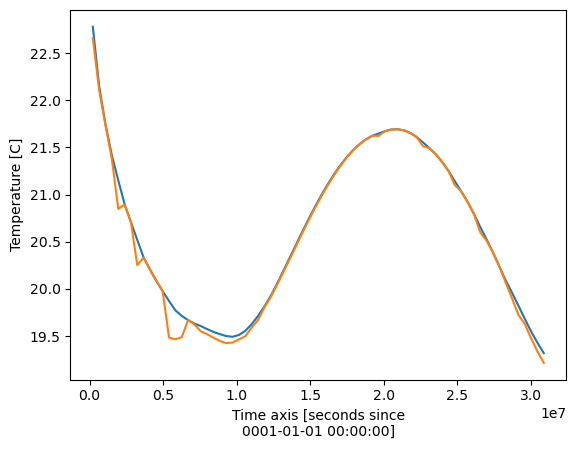

In [6]:
ds_T.votemper.isel(x=15, y=10, deptht=0).plot()
ds_T.votemper.sel(deptht=mld, method="nearest").isel(x=15, y=10).plot()

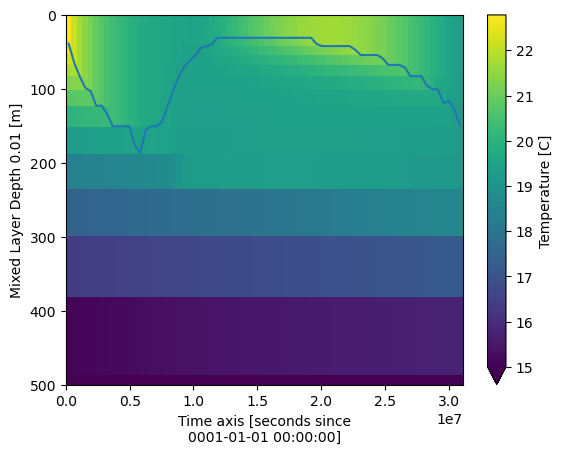

In [7]:
ds_T.votemper.isel(x=15, y=10).T.plot(ylim=(500, 0), vmin=15)
mld.isel(x=15, y=10).plot()

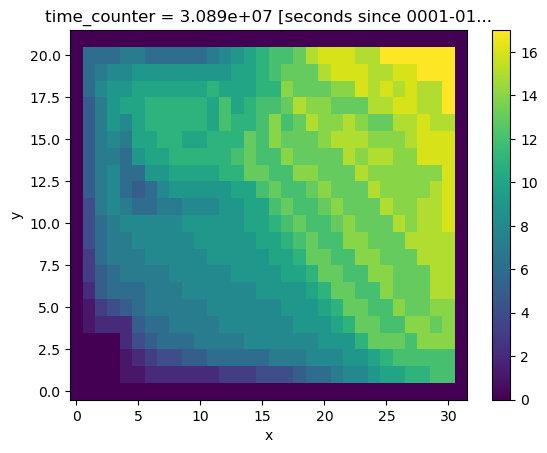

In [8]:
ml_base_index_w = (ds_W.depthw < mld).sum("depthw")
ml_base_index_w.isel(time_counter=-1).plot()

In [9]:
W_above_ML_base = ds_W.vovecrtz.isel(depthw=ml_base_index_w)
W_below_ML_base = ds_W.vovecrtz.isel(depthw=ml_base_index_w + 1)

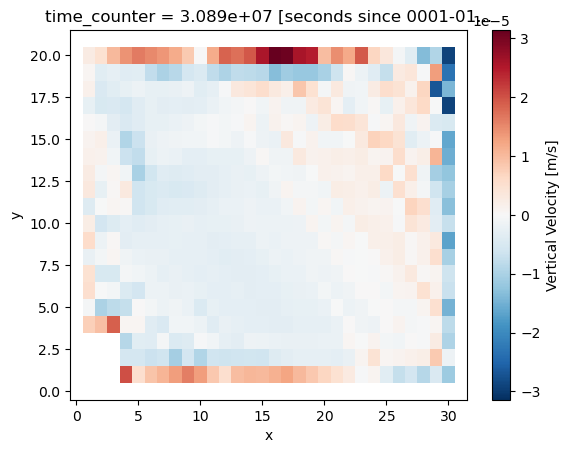

In [10]:
W_above_ML_base.isel(time_counter=-1).plot()

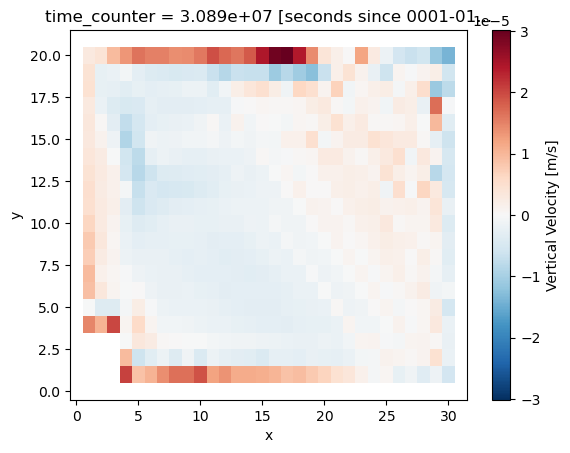

In [11]:
W_below_ML_base.isel(time_counter=-1).plot()

In [13]:
mld_tendency = mld.diff("time_counter")
mld_tendency

<xarray.DataArray 'somxl010' (time_counter: 71, y: 22, x: 32)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  33.22505  ,
          36.6753   ,         nan],
        [        nan,         nan,         nan, ...,  31.588367 ,
          32.266457 ,         nan],
        ...,
        [        nan,  22.740078 ,  25.418854 , ...,  44.656834 ,
          49.36873  ,         nan],
        [        nan,  22.813797 ,  23.640236 , ...,  49.622646 ,
          50.84672  ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  21.703552 ,
          23.047173 ,         nan],
        [        nan,         nan,         nan, ...,  20.045883 ,
          21.890388 ,         nan],
...
        [        nan,   5.3441353,   0.       , ...,   0.       ,
           0.       ,         nan],
        [        nan,  12.024296 ,   0.       , ...,   0.       ,
           0.       ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  40.95424  ,
           0.       ,         nan],
        [        nan,         nan,         nan, ...,  18.858124 ,
           6.403    ,         nan],
        ...,
        [        nan,   0.       ,   0.       , ..., 118.869995 ,
           0.       ,         nan],
        [        nan,   1.3360367,   0.       , ...,   0.       ,
           0.       ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * time_counter  (time_counter) float64 6.48e+05 1.08e+06 ... 3.089e+07
Dimensions without coordinates: y, x

In [24]:
from matplotlib import pyplot as plt

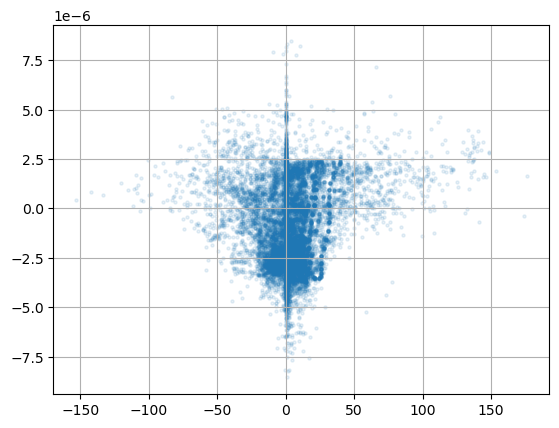

In [26]:
plt.scatter(
    mld_tendency.isel(x=slice(4, -4), y=slice(4, -4)).transpose("time_counter", "y", "x").data,
    W_below_ML_base.isel(x=slice(4, -4), y=slice(4, -4)).transpose("time_counter", "y", "x").isel(time_counter=slice(None, -1)).data,
    s=5,
    alpha=0.1,
)
plt.grid()